In [2]:
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append('../')
sys.path.append('/Users/nolansmyth/Code/SPISEA')
sys.path.append('/Users/nolansmyth/Code/SPISEA/cdbs')
sys.path.append('/Users/nolansmyth/Code/galaxia/galaxia/bin')

%env PYTHONPATH=/Users/nolansmyth/Code/SPISEA/spisea
%env PYSYN_CDBS=/Users/nolansmyth/Code/SPISEA/cdbs
%env SPISEA_MODELS=/Users/nolansmyth/Code/SPISEA/
import os
os.environ["PATH"] = "/Users/nolansmyth/Code/galaxia/galaxia/bin:" + os.environ["PATH"]

from popsycle import synthetic
from popsycle import utilsi
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

%reload_ext autoreload
%autoreload 2

env: PYTHONPATH=/Users/nolansmyth/Code/SPISEA/spisea
env: PYSYN_CDBS=/Users/nolansmyth/Code/SPISEA/cdbs
env: SPISEA_MODELS=/Users/nolansmyth/Code/SPISEA/


In [3]:
mock_roman_params = {"fdm": 1.0, 
                     "pbh_mass":30, 
                     "v_esc":550, 
                     "rho_0":0.0093, 
                     "r_s": 18.6, 
                     "r_max":16.6 , 
                     "gamma": 1.0, 
                     "obs_time":1825, 
                     "cadence":3, 
                     "blend_rad": 0.09, 
                     "longitude": 1.00, 
                     "latitude": -1.03, 
                     "area": 0.16,
                     "BH_kick_speed_mean": 100,
                     "NS_kick_speed_mean": 350
                     }

In additional to the usual python/astropy things, you'll need to install Galaxia, PyPopStar, PopSyCLE.
For PyPopStar, it goes faster once you've made isochrones.
Same goes from PopSyCLE with the initial-final cluster mass ratio file.

# Galaxia

This is where you generate the stellar model and set the survey direction and area.

Galaxia requires a text file containing the parameters you want for the model,
following the format given in the Galaxia example. That file can either be 
generated by hand, or with the `write_galaxia_params` function. 

To create the file `galaxia_params.example.txt`, run:


In [19]:
synthetic.write_galaxia_params(output_root = 'example',
                               longitude = mock_roman_params['longitude'],
                               latitude = mock_roman_params['latitude'],
                               area = mock_roman_params['area'],)

** Generating galaxia_params.example.txt **
-- outputFile example
-- outputDir ./
-- photoSys UBV
-- magcolorNames V,B-V
-- appMagLimits[0] -1000
-- appMagLimits[1] 1000
-- absMagLimits[0] -1000
-- absMagLimits[1] 1000
-- colorLimits[0] -1000
-- colorLimits[1] 1000
-- geometryOption 1
-- longitude 1.000000
-- latitude -1.030000
-- surveyArea 0.16000
-- fSample 1
-- popID -1
-- warpFlareOn 1
-- seed 88
-- r_max 30
-- starType 0
-- photoError 0



Then create the stellar model, 
by running `galaxia -r galaxia_params.example.txt` on the command line. 
PopSyCLE can also combine these two steps by executing:


In [21]:
synthetic.run_galaxia(output_root = 'example',
                      longitude = mock_roman_params['longitude'],
                      latitude = mock_roman_params['latitude'],
                      area = mock_roman_params['area'],
                      galaxia_galaxy_model_filename='galaxyModelParams_Popsycle_roman.txt')

** Generating galaxia_params.example.txt **
-- outputFile example
-- outputDir ./
-- photoSys UBV
-- magcolorNames V,B-V
-- appMagLimits[0] -1000
-- appMagLimits[1] 1000
-- absMagLimits[0] -1000
-- absMagLimits[1] 1000
-- colorLimits[0] -1000
-- colorLimits[1] 1000
-- geometryOption 1
-- longitude 1.000000
-- latitude -1.030000
-- surveyArea 0.16000
-- fSample 1
-- popID -1
-- warpFlareOn 1
-- seed 66
-- r_max 30
-- starType 0
-- photoError 0
** Executing Galaxia with galaxia_params.example.txt and galaxyModelParams_Popsycle_roman.txt **
Galaxia complete
galaxia runtime : 555.192775 s


 
The results should look like this:



CODEDATAPATH=/u/casey_lam/scratch/GalaxiaData/

Reading Parameter file-             galaxia_params.example.txt
___

outputFile               example                 
outputDir                ./                      
photoSys                 UBV                     
magcolorNames            V,B-V                   
appMagLimits[0]          -1000                   
appMagLimits[1]          1000                    
absMagLimits[0]          -1000                   
absMagLimits[1]          1000                    
colorLimits[0]           -1000                   
colorLimits[1]           1000                    
geometryOption           1                       
longitude                1.25                    
latitude                 -2.65                   
surveyArea               0.001                   
fSample                  1                       
popID                    -1                      
warpFlareOn              1                       
seed                     12                      
r_max                    20                      
starType                 0                       
photoError               0                       
___
Reading tabulated values from file- /u/casey_lam/scratch/GalaxiaData/Model/vcirc.dat
Using geometry:                     Patch at l ,b : (1.25 -2.65) d_theta=0.0178412
Reading Isochrones from dir-        /u/casey_lam/scratch/GalaxiaData/Isochrones/padova/UBV
Isochrone Grid Size:                (Age bins=182,Feh bins=34,Alpha bins=1)
Time Isocrhone Reading              2.73553     
Generating populations................
___
Thin Disk,ID=0:
Reading tree from file-             /u/casey_lam/scratch/GalaxiaData/BHTree-2.2/bhtree_with_wf/bhtree_0_E1.ebf
Time Tree generation/reading =      1.34589     
Completed % <0..10..20..30..40..50..60..70..80..90..>
Stars spawned =                     15          
Time Spawning=                      0.519746    
___
Thin Disk,ID=1:
Reading tree from file-             /u/casey_lam/scratch/GalaxiaData/BHTree-2.2/bhtree_with_wf/bhtree_1_E1.ebf
Time Tree generation/reading =      0.894184    
Completed % <0..9..19..29..39..49..59..69..79..89..99..>
Stars spawned =                     785         
Time Spawning=                      3.01123     
___
Thin Disk,ID=2:
Reading tree from file-             /u/casey_lam/scratch/GalaxiaData/BHTree-2.2/bhtree_with_wf/bhtree_2_E1.ebf
Time Tree generation/reading =      1.21969     
Completed % <0..9..19..29..39..49..59..69..79..89..99..>
Stars spawned =                     2304        
Time Spawning=                      2.31239     
___
Thin Disk,ID=3:
Reading tree from file-             /u/casey_lam/scratch/GalaxiaData/BHTree-2.2/bhtree_with_wf/bhtree_3_E1.ebf
Time Tree generation/reading =      1.12221     
Completed % <0..9..19..29..39..49..59..69..79..89..99..>
Stars spawned =                     3299        
Time Spawning=                      2.63636     
___
Thin Disk,ID=4:
Reading tree from file-             /u/casey_lam/scratch/GalaxiaData/BHTree-2.2/bhtree_with_wf/bhtree_4_E1.ebf
Time Tree generation/reading =      1.12869     
Completed % <0..9..19..29..39..49..59..69..79..89..99..>
Stars spawned =                     9040        
Time Spawning=                      5.16435     
___
Thin Disk,ID=5:
Reading tree from file-             /u/casey_lam/scratch/GalaxiaData/BHTree-2.2/bhtree_with_wf/bhtree_5_E1.ebf
Time Tree generation/reading =      0.924357    
Completed % <0..9..19..29..39..49..59..69..79..89..99..>
Stars spawned =                     9983        
Time Spawning=                      5.99943     
___
Thin Disk,ID=6:
Reading tree from file-             /u/casey_lam/scratch/GalaxiaData/BHTree-2.2/bhtree_with_wf/bhtree_6_E1.ebf
Time Tree generation/reading =      1.03473     
Completed % <0..9..19..29..39..49..59..69..79..89..99..>
Stars spawned =                     11927       
Time Spawning=                      5.80737     
___
ThickDisk:
Reading tree from file-             /u/casey_lam/scratch/GalaxiaData/BHTree-2.2/bhtree_with_wf/bhtree_7_E0.ebf
Time Tree generation/reading =      1.00016     
Completed % <0..9..19..29..39..49..59..69..79..89..99..>
Stars spawned =                     6561        
Time Spawning=                      1.83702     
___
Spheroid:
Reading tree from file-             /u/casey_lam/scratch/GalaxiaData/BHTree-2.2/bhtree_with_wf/bhtree_8_E0.ebf
Time Tree generation/reading =      0.320754    
Completed % <0..9..19..29..39..49..59..69..79..89..99..>
Stars spawned =                     589         
Time Spawning=                      0.693446    
___
Bulge:
Reading tree from file-             /u/casey_lam/scratch/GalaxiaData/BHTree-2.2/bhtree_with_wf/bhtree_9_E0.ebf
Time Tree generation/reading =      1.0575      
Completed % <0..9..19..29..39..49..59..69..79..89..99..>
Stars spawned =                     620676      
Time Spawning=                      28.1113     
___
Total stars written                 665179                  
File written-                       .//example.ebf
Calulating magnitudes................
Reading Isochrones from dir-        /u/casey_lam/scratch/GalaxiaData/Isochrones/padova/UBV
Isochrone Grid Size:                (Age bins=182,Feh bins=34,Alpha bins=1)
Time Isocrhone Reading              2.67512     
Calulating Extinction................
Time for extinction calculation     0.876306    
Total Time=                         73.89 


# Population Synthesis

The stellar model now needs compact objects, which we inject with PopSyCLE. 
This produces an .h5 file with both stars and compact objects, sorted by latitude and longitude.
Here you can set the black hole and neutron star kick speeds.

In [4]:
synthetic.perform_pop_syn(ebf_file = 'example.ebf', 
                          output_root = 'example',
                          iso_dir = '/Users/nolansmyth/Code/galaxia/GalaxiaData/Isochrones/',
                          bin_edges_number = None, 
                          BH_kick_speed_mean = mock_roman_params['BH_kick_speed_mean'],
                          NS_kick_speed_mean = mock_roman_params['NS_kick_speed_mean'],
                          overwrite=True)

*********************** Starting popid 0
Starting age bin  5.0100998878479
Starting sub-bin  0
Found 26 stars out of mass range
Starting age bin  6.3
Starting sub-bin  0
Starting age bin  7.0
Starting sub-bin  0
Starting age bin  7.7
Starting sub-bin  0
Starting age bin  8.0
Starting sub-bin  0
*********************** Starting popid 1
Starting age bin  8.176093101501465
Starting sub-bin  0
Found 1509 stars out of mass range
Starting age bin  8.384319826126099
Starting sub-bin  0
Found 2401 stars out of mass range
Starting age bin  8.592546550750733
Starting sub-bin  0
Starting age bin  8.800773275375365
Starting sub-bin  0
*********************** Starting popid 2
Starting age bin  9.0
Starting sub-bin  0
Found 3824 stars out of mass range
Starting age bin  9.077582797288894
Starting sub-bin  0
Found 12248 stars out of mass range
Starting age bin  9.155165594577788
Starting sub-bin  0
Found 4653 stars out of mass range
Starting age bin  9.232748391866684
Starting sub-bin  0
Found 17619 

### Add PBHs

In [5]:
#Most of these are default values, but want to show them all for clarity
synthetic.add_pbh('example.h5', 
                  'example.ebf', 
                  new_output_root='example_pbh', 
                  pbh_mass=mock_roman_params['pbh_mass'], 
                  fdm=mock_roman_params['fdm'],
                  v_esc = mock_roman_params['v_esc'],
                  rho_0=mock_roman_params['rho_0'],
                  r_s = mock_roman_params['r_s'], 
                  r_max = mock_roman_params['r_max'],
                  gamma=mock_roman_params['gamma'],)

Projected density along line-of-sight = 1.29e+09 [M_sun kpc**-2]
Mass within line-of-sight cylinder = 1.73e+07 [M_sun]
Number of PBH before and after light cone masking: 576901 and 150622, respectively
150622 PBHs in the field
- 0 PBHS removed from example.h5
--- 75440179 original objects
--- 150622 PBHs in the field
--- 75590801 new total objects
Binned PBHs equals total PBHs
add_pbh runtime: 53.363916 s


# Finding microlensing events

Here is when all microlensing events are found.
You can set the survey duration, cadence, maximum impact parameter, blend radius.
This also has the option of being parallelizable.

In [6]:
#Set to Roman Params from paper
synthetic.calc_events(hdf5_file = 'example_pbh.h5', 
                      output_root2 = 'example_pbh', 
                      radius_cut = 2,
                      obs_time = mock_roman_params["obs_time"], 
                      n_obs = int(mock_roman_params["obs_time"]/mock_roman_params["cadence"]), 
                      theta_frac = 2, 
                      blend_rad = mock_roman_params["blend_rad"], 
                      overwrite = True, 
                      n_proc = 7,) #adjust based on your number of cores

/Users/nolansmyth/opt/anaconda3/envs/popsycle/lib/python3.10/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /Users/nolansmyth/Code/SPISEA/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/Users/nolansmyth/opt/anaconda3/envs/popsycle/lib/python3.10/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /Users/nolansmyth/Code/SPISEA/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/Users/nolansmyth/opt/anaconda3/envs/popsycle/lib/python3.10/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /Users/nolansmyth/Code/SPISEA/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/Users/nolansmyth/opt/anaconda3/envs/popsycle/lib/python3.10/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /Users/nolansmyth/Code/SPISEA/cdbs/extinction
  warnings.warn('Extinction files not

Working on loop ll, bb =  0 Working on loop ll, bb = Working on loop ll, bb =   310 22
 Working on loop ll, bb = Working on loop ll, bb = 
24 2 23
 
4 Working on loop ll, bb =  215 
20
Working on loop ll, bb =  0 25
Working on loop ll, bb =  1 25
Working on loop ll, bb =  0 1
Working on loop ll, bb =  1 0
Working on loop ll, bb =  2 24
Working on loop ll, bb =  2 0
Working on loop ll, bb =  0 2
Working on loop ll, bb =  2 25
Working on loop ll, bb =  1 1
Working on loop ll, bb =  3 0
Working on loop ll, bb =  2 1
Working on loop ll, bb =  0 3
Working on loop ll, bb =  3 1
Working on loop ll, bb =  2 2
Working on loop ll, bb =  0 4
Working on loop ll, bb =  3 2
Working on loop ll, bb =  2 3
Working on loop ll, bb =  1 2
Working on loop ll, bb =  0 5
Working on loop ll, bb =  1 3
Working on loop ll, bb =  2 4
Working on loop ll, bb =  0 6
Working on loop ll, bb =  3 3
Working on loop ll, bb =  1 4
Working on loop ll, bb =  0 7
Working on loop ll, bb =  0 8
Working on loop ll, bb =  1 5
W

# Photometry

This is the last thing, where you choose the photometric band for the observations and the reddening law.
The final file of microlensing events is produced here as a .fits file.

In [8]:
synthetic.refine_events(input_root = 'example_pbh', 
                        filter_name = 'I',
                        photometric_system = 'ubv',
                        red_law = 'Damineli16', 
                        overwrite = False, 
                        output_file = 'default')

Original candidate events:  24503
Candidate events in survey window:  23418
refine_events runtime : 32.611379 s


# Things you can do with PopSyCLE

First, read in the table, and print out a list of all the possible keys:

In [9]:
# t = Table.read('example_refined_events_i_Damineli16.fits')
t = Table.read('example_pbh_refined_events_ubv_I_Damineli16.fits')

print(t.colnames)

['zams_mass_L', 'mass_L', 'px_L', 'py_L', 'pz_L', 'vx_L', 'vy_L', 'vz_L', 'age_L', 'popid_L', 'exbv_L', 'glat_L', 'glon_L', 'mbol_L', 'grav_L', 'teff_L', 'feh_L', 'rad_L', 'rem_id_L', 'obj_id_L', 'ubv_J_L', 'ubv_H_L', 'ubv_K_L', 'ubv_U_L', 'ubv_I_L', 'ubv_B_L', 'ubv_V_L', 'ubv_R_L', 'vr_L', 'mu_b_L', 'mu_lcosb_L', 'zams_mass_S', 'mass_S', 'px_S', 'py_S', 'pz_S', 'vx_S', 'vy_S', 'vz_S', 'age_S', 'popid_S', 'exbv_S', 'glat_S', 'glon_S', 'mbol_S', 'grav_S', 'teff_S', 'feh_S', 'rad_S', 'rem_id_S', 'obj_id_S', 'ubv_J_S', 'ubv_H_S', 'ubv_K_S', 'ubv_U_S', 'ubv_I_S', 'ubv_B_S', 'ubv_V_S', 'ubv_R_S', 'vr_S', 'mu_b_S', 'mu_lcosb_S', 'theta_E', 'u0', 'mu_rel', 't0', 't_E', 'ubv_I_app_S', 'ubv_I_app_L', 'cent_glon_I_N', 'cent_glat_I_N', 'ubv_I_app_N', 'ubv_I_app_LSN', 'delta_m_I', 'f_blend_I', 'pi_rel', 'pi_E']


## Figure out how many events due to BH, NS, WD, star

In [10]:
pbh_idx = np.where(t['rem_id_L'] == 104)[0]
bh_idx = np.where(t['rem_id_L'] == 103)[0]
ns_idx = np.where(t['rem_id_L'] == 102)[0]
wd_idx = np.where(t['rem_id_L'] == 101)[0]
st_idx = np.where(t['rem_id_L'] == 0)[0]
print('Number of PBHs: ' + str(len(pbh_idx)))
print('Number of BHs: ' + str(len(bh_idx)))
print('Number of NSs: ' + str(len(ns_idx)))
print('Number of WDs: ' + str(len(wd_idx)))
print('Number of stars: ' + str(len(st_idx)))

Number of PBHs: 839
Number of BHs: 281
Number of NSs: 349
Number of WDs: 2580
Number of stars: 19369


## Histogram of tE

Text(0.5, 0, '$t_E$ (days)')

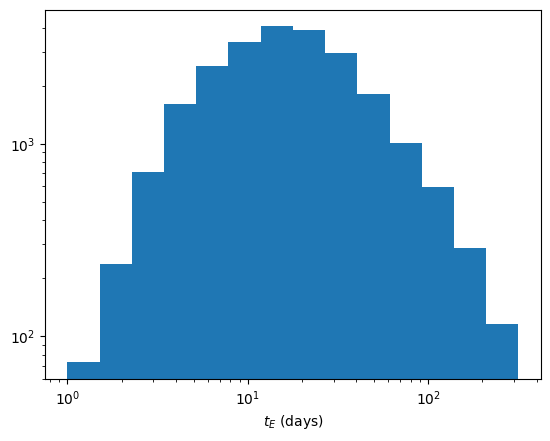

In [11]:
plt.hist(t['t_E'], bins = np.logspace(0, 2.5, 15))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t_E$ (days)')

## piE vs tE

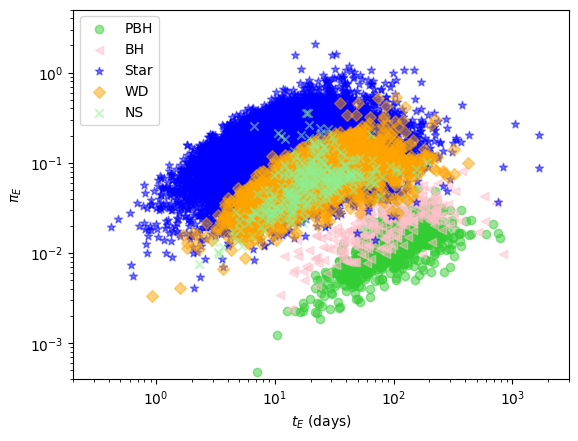

In [14]:
plt.scatter(t['t_E'][pbh_idx], t['pi_E'][pbh_idx], color = 'limegreen', marker='o', label = 'PBH', alpha=0.5)
plt.scatter(t['t_E'][bh_idx], t['pi_E'][bh_idx], color = 'pink', marker='<', label = 'BH', alpha=0.5)
plt.scatter(t['t_E'][st_idx], t['pi_E'][st_idx], color = 'blue', marker='*', label = 'Star', alpha=0.5)
plt.scatter(t['t_E'][wd_idx], t['pi_E'][wd_idx], color = 'orange', marker='D', label = 'WD', alpha=0.5)
plt.scatter(t['t_E'][ns_idx], t['pi_E'][ns_idx], color = 'lightgreen', marker='x', label = 'NS', alpha=0.5)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t_E$ (days)')
plt.ylabel('$\pi_E$')
plt.xlim(2e-1, 3e3)
plt.ylim(4e-4, 5e0)
plt.legend()
plt.show()

## dL vs dS

Text(0, 0.5, '$d_S$ (kpc)')

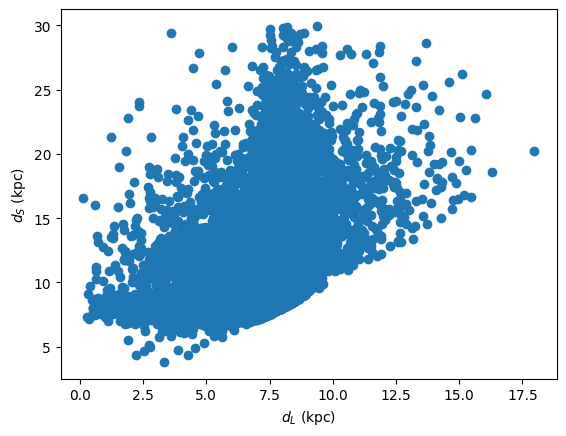

In [13]:
plt.scatter(t['rad_L'], t['rad_S'])
plt.xlabel('$d_L$ (kpc)')
plt.ylabel('$d_S$ (kpc)')